# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 9 Деления координатной оси Ticks

### Содержание главы

1. Контейнер Ticks;

2. Locator и Formatter.

Деления (ticks) неотделимы от координатной оси на которой они находятся. Однако свойства самих делений (цвет, длина, толщина и др.), и их подписей (кегль, поворот, цвет шрифта, шрифт и др.), а также связанные с ними линии вспомогательной сетки grid, удобно хранить в отдельном хранилище-контейнере Ticks, а не в контейнере Axis. Повторюсь, что эти вещи очень связаны и одно в отрыве от другого теряет смысл. Тем более, что для удобства пользователей разработчики сделали множество методов для работы с делениями из контейнеров более высокого уровня (Axes, Axis). 

### Электронные ресурсы:

+ [Описание элементов рисунка в matplotlib](http://matplotlib.org/users/artists.html);

+ [Пример работы с главными и вспомогательными делениями координатных осей методами Locator и Formatter](http://matplotlib.org/examples/pylab_examples/major_minor_demo1.html);

+ [О Locator и Formatter](http://matplotlib.org/api/ticker_api.html).

### 9.1 Контейнер Ticks

Контейнер `matplotlib.axis.Tick` - это последний и самый низкоуровневый из Artists-контейнеров, самая маленькая "матрёшка". Он содержит экземпляры делений (ticks), линий вспомогательной сетки (grid lines) и подписей (labels) для верхних (upper ticks) и нижних делений (lower ticks). К каждому из них есть прямой доступ как к одному из атрибуту экземпляра Tick. Также контейнер существуют логические переменные с помощью которых можно определить с какой стороны будут нанесены подписи и деления: для оси ординат справа/слева, а для оси абсцисс - сверху/снизу в прямоугольной системе координат.

Для работы непросредственно с экземпляром Tick, необходимо "спуститься" к нему с более высоких контейнеров-уровней. 

> Axes - Axis(YAxis) - методы "set-get" -> `ax.yaxis.get_major_ticks()`

Для такого объекта определены следующие атрибуты:

------------------------------------------------------------------------

Атрибут Tick -> Описание

------------------------------------------------------------------------

+ **tick1line** - экземпляр Line2D;

+ **tick2line** - экземпляр Line2D;

+ **gridline** - экземпляр Line2D;

+ **label1** - экземпляр Text;

+ **label2** - экземпляр Text;

+ **gridOn** - логическая переменная, разрешающая рисовать tickline;

+ **tick1On** - логическая переменная, разрешающая рисовать первую tickline;

+ **tick2On** - логическая переменная, разрешающая рисовать вторую tickline;

+ **label1On** - логическая переменная, разрешающая рисовать tick label;

+ **label2On** - логическая переменная, разрешающая рисовать tick label.

------------------------------------------------------------------------

Атрибуты с номером 1 - это стандартно отображаемые деления, которые располагаются слева и/или снизу.

Атрибуты с номером 2 - соответственно справа и/или снизу.


Major ticks on Y-axis <class 'matplotlib.axis.YTick'>
Major ticks on Y-axis <class 'matplotlib.axis.YTick'>
Major ticks on Y-axis <class 'matplotlib.axis.YTick'>
Major ticks on Y-axis <class 'matplotlib.axis.YTick'>
Major ticks on Y-axis <class 'matplotlib.axis.YTick'>
Major ticks on Y-axis <class 'matplotlib.axis.YTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>
Major ticks on X-axis <class 'matplotlib.axis.XTick'>


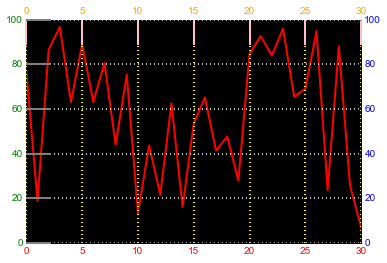

In [2]:
# Пример 9.1

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.patch
rect.set_facecolor('k')

N = 31
x = np.arange(N)
y = 100*np.random.rand(N)

ax.plot(x, y, color='red', linewidth=2.0)

#formatter = mpl.ticker.FormatStrFormatter(u'%.2f руб.')
#ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    print 'Major ticks on Y-axis %s' % type(tick)
    tick.label1On = True
    tick.label1.set_color('green')
    tick.label2On = True
    tick.label2.set_color('blue')
    # серые деления на оси ОY слева
    tick.tick1line.set_color('grey')
    tick.tick1line.set_markeredgewidth(2)
    tick.tick1line.set_markersize(25)
    # линии вспомогательной сетки для оси OX
    tick.gridOn = True
    tick.gridline.set_color('white')
    tick.gridline.set_linewidth(1.5)
    
for tick in ax.xaxis.get_major_ticks():
    print 'Major ticks on X-axis %s' % type(tick)
    tick.label1On = True
    tick.label1.set_color('red')
    tick.label2On = True
    tick.label2.set_color('orange')
    # розовые деления на оси ОX сверху
    tick.tick2line.set_color('pink')
    tick.tick2line.set_markeredgewidth(2)
    tick.tick2line.set_markersize(25)
    # линии вспомогательной сетки для оси OY
    tick.gridOn = True
    tick.gridline.set_color('yellow')
    tick.gridline.set_linewidth(2.)

save('pic_9_1', fmt='png')
save('pic_9_1', fmt='pdf')
    
plt.show()

### 9.2 Locator и Formatter

Деления могут быть как главными (major ticks), так и вспомогательными (minor ticks). Работа с делениями в обоих случаях одинаковая.

Однако, если главные деления будут автоматически созданы при вызове графической команды (например `ax.plot()` или `ax.hist()`), и с ними, соответственно, можно работать c помощью `ax.xaxis.get_major_ticks()` или `ax.yaxis.get_major_ticks()`, то вспомогательные деления необходимо задавать вручную. Удобнее всего это делать с помощью методов Formatter и Locator.

Методы Locator и Formatter относятся к модулю `matplotlib.ticker`. Этот модуль содержит классы, позволяющие наиболее полно определять форматирование и местоположение делений. Это самый низкоуровневый способ форматирования делений на координатных осях. 

Контейнеры коодинатных осей XAxis и YAxis имеют специальные методы для работы с объектами типа Formatter: `.set_major/minor_locator()` и `.set_major/minor_formatter()`. Например:

+ `xax.set_major_locator()`;

+ `xax.set_major_formatter()`;

+ `yax.set_minor_locator()`;

+ `yax.set_minor_formatter()`.

В качестве входящих данных данным методам нужно передать какой-либо экземпляр класса из модуля `matplotlib.ticker`, например, `matplotlib.ticker.MultipleLocator`.

In [3]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator   = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')

print(type(majorLocator))
print(type(majorFormatter))

<class 'matplotlib.ticker.MultipleLocator'>
<class 'matplotlib.ticker.FormatStrFormatter'>


Класс Locator является базовым классом для всех производных классов-локаторов, отвечающих за расположение делений. Локаторы работают с автомасштабированием в пределах области изменения данных, и исходя из этого определяют положение делений на оси. Одним из наиболее удобных является полуавтоматический локатор MultipleLocator. В качестве входящих данных он принимает целое число, например 10, и самостоятельно подбирает пределы изменений на оси и располагает деления в местах, кратных заданному числу. 

Другой пример - субкласс AutoMinorLocator(). Он позволяет автоматически определить положение вспомогательных делений. В качестве входящего параметра даётся целое число n - число промежутков, разделённых вспомогательными делениями, между двумя главными делениями. Это один их самых простых способов задать положение и значения вспомогательных делений. Форматирование подписей к таким делениям (их строковое представление), легче всего осуществить с помощью методов-форматеров. Подробнее о субклассах Locator смотри в электронных материалах.

Класс Formatter является базовым для всех производных классов-форматеров, отвечающих за форматирование делений. Форматеры в качестве входящих данных принимают строку формата, например "%d", которая применяется к подписи каждого деления. Разные субклассы предоставляют разный функционал. Так субкласс NullFormatter() позволяет скрыть все подписи на выбранной оси. Подробнее о субклассах Formatter смотри в электронных материалах.

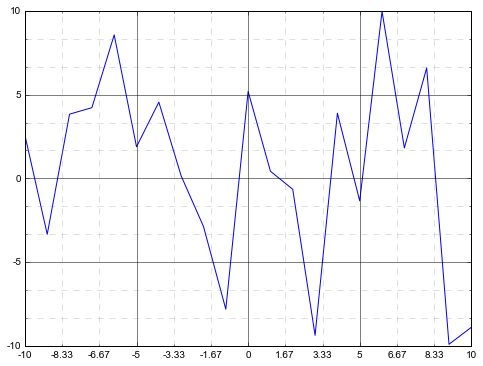

In [4]:
# Пример 9.2.1

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter

majorLocator   = MultipleLocator(5)
# Автоматический подбор промежуточных делений. Количество созданных делений равно n-1
minorLocator   = AutoMinorLocator(n=3)   

majorFormatter = FormatStrFormatter('%d')
minorFormatter = FormatStrFormatter('%.2f')

N = 10
x = np.arange(-N, N+1, 1) 
y = (np.random.random(len(x))*2.-1)*N

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x, y)

xax = ax.xaxis
yax = ax.yaxis

xax.set_major_locator(majorLocator)
xax.set_major_formatter(majorFormatter)
yax.set_major_locator(majorLocator)
yax.set_major_formatter(majorFormatter)

xax.set_minor_locator(minorLocator)
xax.set_minor_formatter(minorFormatter)
yax.set_minor_locator(minorLocator)
yax.set_minor_formatter(NullFormatter()) # скрываем подписи вспомогательных делений по оси OY

ax.grid(True, which='major', color='k', linestyle='solid')

ax.grid(True, which='minor', color='grey', linestyle='dashed', alpha=0.5)
#yax.grid(True, which='minor', color='grey', linestyle='dashed', alpha=0.5)

#for label in xax.get_ticklabels():
#    label.set_color('red')
#    label.set_rotation(30)
#    label.set_fontsize(12)

# для вспомогательных for the minor ticks, use no labels; default NullFormatter

save('pic_9_2_1', fmt='png')
save('pic_9_2_1', fmt='pdf')

plt.show()

<class 'matplotlib.ticker.FixedLocator'>


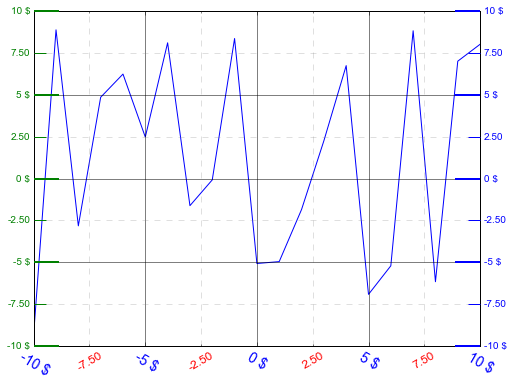

In [5]:
# Пример 9.2.2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedLocator

majorLocator   = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d $')

# FixedLocator позволяет задать последовательность подписей. 
# Если множество подписей имеет пересечения с множеством других подписей, то 
# они будут перекрываться (случай пересечения главных и вспомогательных делений)
minorLocator   = FixedLocator(np.arange(-7.5, 12.5, 5.))
print(type(minorLocator))
minorFormatter = FormatStrFormatter('%.2f')

N = 10
x = np.arange(-N, N+1, 1) 
y = (np.random.random(len(x))*2.-1)*N

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x, y)

xax = ax.xaxis
yax = ax.yaxis

xax.set_major_locator(majorLocator)
xax.set_major_formatter(majorFormatter)
yax.set_major_locator(majorLocator)
yax.set_major_formatter(majorFormatter)

xax.set_minor_locator(minorLocator)
xax.set_minor_formatter(minorFormatter)
yax.set_minor_locator(minorLocator)
yax.set_minor_formatter(minorFormatter)

ax.grid(True, which='major', color='k', linestyle='solid')

ax.grid(True, which='minor', color='grey', linestyle='dashed', alpha=0.5)
#yax.grid(True, which='minor', color='grey', linestyle='dashed', alpha=0.5)

for label in xax.get_ticklabels(which='minor'):
    label.set_color('red')
    label.set_rotation(30)
    label.set_fontsize(12)

for label in xax.get_ticklabels(which='major'):
    label.set_color('blue')
    label.set_rotation(-30)
    label.set_fontsize(14)
    
for tick in yax.get_major_ticks():
    tick.label1On = True
    tick.label1.set_color('green')
    tick.label2On = True
    tick.label2.set_color('blue')
    # серые деления на оси ОY слева
    tick.tick1line.set_color('green')
    tick.tick1line.set_markeredgewidth(2)
    tick.tick1line.set_markersize(25)    

    tick.tick2line.set_color('blue')
    tick.tick2line.set_markeredgewidth(2)
    tick.tick2line.set_markersize(25)    

for tick in yax.get_minor_ticks():
    tick.label1On = True
    tick.label1.set_color('green')
    tick.label2On = True
    tick.label2.set_color('blue')
    # серые деления на оси ОY слева
    tick.tick1line.set_color('green')
    tick.tick1line.set_markeredgewidth(1)
    tick.tick1line.set_markersize(12)    

    tick.tick2line.set_color('blue')
    tick.tick2line.set_markeredgewidth(1)
    tick.tick2line.set_markersize(12)

# для вспомогательных for the minor ticks, use no labels; default NullFormatter

save('pic_9_2_2', fmt='png')
save('pic_9_2_2', fmt='pdf')

plt.show()


Также некоторые элементы форматирования делений и их подписей вынесены в настройки rcParams :

+ **xtick.color**='k' - цвет делений по оси абсцисс;

+ **xtick.direction**='in' - направление деления [] по оси абсцисс;

+ **xtick.labelsize**='medium' - размер подписи деления на оси абсцисс;

+ **xtick.major.pad**=4.0 - расстояние от координатной оси для главных делений оси абсцисс;

+ **xtick.major.size**=4.0 - размер главного деления оси абсцисс;

+ **xtick.major.width**=0.5 - толщина главного деления оси абсцисс;

+ **xtick.minor.pad**=4.0 - расстояние от координатной оси для вспомогательных делений оси абсцисс;

+ **xtick.minor.size**=2.0 - размер вспомогательного деления;

+ **xtick.minor.width**=0.5 - толщина вспомогательного деления;

+ **ytick.color**='k' - цвет делений по оси ординат;

+ **ytick.direction**='in' - направление деления [] по оси ординат;

+ **ytick.labelsize**='medium' - размер подписи деления на оси абсцисс;

+ **ytick.major.pad**=4.0 - расстояние от координатной оси для главных делений оси ординат;

+ **ytick.major.size**=4.0 - размер главного деления оси ординат;

+ **ytick.major.width**=0.5 - толщина главного деления оси ординат;

+ **ytick.minor.pad**=4.0 - расстояние от координатной оси для вспомогательных делений оси ординат;

+ **ytick.minor.size**=2.0 - размер главного деления оси ординат;

+ **ytick.minor.width**=0.5 - толщина главного деления оси ординат.

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

> + [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)